In [87]:
import networkx as nx

ModuleNotFoundError: No module named 'networkx'

In [ ]:
nodes = [1, 2, 3]
edges = [()]

In [3]:
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from()


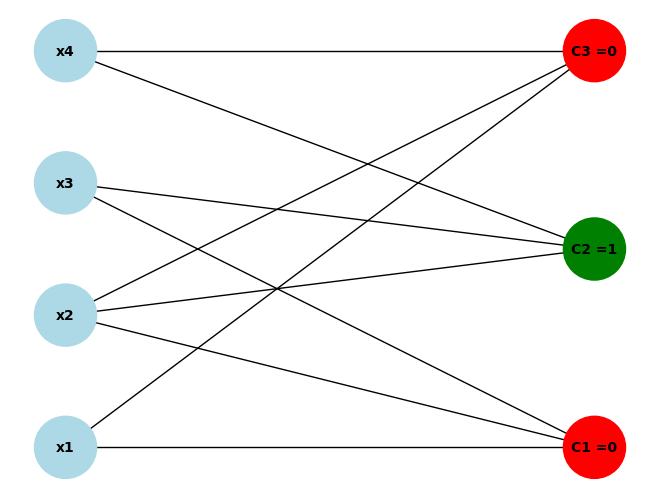

In [52]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_xorsat_problem(variables, constraints):
    """
    Visualize a Max-3-XORSAT problem using NetworkX, with constraint nodes colored 
    based on their XOR value (0 = red, 1 = yellow).
    
    :param variables: List of variable names (e.g., ['x1', 'x2', 'x3']).
    :param constraints: List of XOR constraints. Each constraint is a tuple of 
                        (v1, v2, v3, b), where v1, v2, and v3 are the variables involved,
                        and b is the result of their XOR (0 or 1).
    """
    # Create a bipartite graph where one set is variables and the other is constraints
    G = nx.Graph()

    # Add the variables as one set of nodes
    for var in variables:
        G.add_node(var, bipartite=0)

    # Add the constraints as nodes and connect them to the variables involved
    for i, (v1, v2, v3, b) in enumerate(constraints):
        # Add a node representing the constraint
        constraint_node = f"C{i+1} ={b}"
        G.add_node(constraint_node, bipartite=1)
        
        # Add edges between the variables and the constraint node
        G.add_edge(v1, constraint_node)
        G.add_edge(v2, constraint_node)
        G.add_edge(v3, constraint_node)

    # Assign node colors: light blue for variables, red for XOR=0, yellow for XOR=1
    node_colors = []
    for node in G.nodes:
        if G.nodes[node].get('bipartite') == 0:
            node_colors.append('lightblue')  # Variables (light blue)
        else:
            # Constraint nodes: red for XOR=0, yellow for XOR=1
            xor_value = int(node.split('=')[1][0])  # Extract XOR value (0 or 1)
            if xor_value == 0:
                node_colors.append('red')  # XOR=0 (red)
            else:
                node_colors.append('green')  # XOR=1 (yellow)

    # Draw the graph
    pos = nx.bipartite_layout(G, nodes=variables)#nx.spring_layout(G)  # Position nodes using spring layout
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=2000, font_size=10, font_weight="bold")
    plt.show()

# Example variables and constraints
variables = ['x1', 'x2', 'x3', 'x4']
constraints = [
    ('x1', 'x2', 'x3', 0),  # x1 ⊕ x2 ⊕ x3 = 0 (red)
    ('x2', 'x3', 'x4', 1),  # x1 ⊕ x2 ⊕ x3 = 1 (yellow)
    ('x1', 'x2', 'x4', 0),  # x1 ⊕ x2 ⊕ x4 = 0 (red)
    #('x2', 'x3', 'x4', 1),  # x2 ⊕ x3 ⊕ x4 = 1 (yellow)
]

# Visualize the problem
visualize_xorsat_problem(variables, constraints)


## Mapping the Max-3-XORSAT problem into qubits 



In [53]:

def create_xorsat_graph(variables, constraints):
    """
    Visualize a Max-3-XORSAT problem using NetworkX, with constraint nodes colored 
    based on their XOR value (0 = red, 1 = yellow).
    
    :param variables: List of variable names (e.g., ['x1', 'x2', 'x3']).
    :param constraints: List of XOR constraints. Each constraint is a tuple of 
                        (v1, v2, v3, b), where v1, v2, and v3 are the variables involved,
                        and b is the result of their XOR (0 or 1).
    """
    # Create a bipartite graph where one set is variables and the other is constraints
    G = nx.Graph()
    node_color = []
    # Add the variables as one set of nodes
    for var in variables:
        G.add_node(var, bipartite=0)
        node_color.append('lightblue')

    
    # Add the constraints as nodes and connect them to the variables involved
    for i, (v1, v2, v3, b) in enumerate(constraints):
        # Add a node representing the constraint
        constraint_node = f"C{i+1}"# ={b}"
        G.add_node(constraint_node, bipartite=1)
        if b == 0:
            node_color.append('red')
        else:
            node_color.append('green')
        
        # Add edges between the variables and the constraint node
        G.add_edge(v1, constraint_node)
        G.add_edge(v2, constraint_node)
        G.add_edge(v3, constraint_node)


    return G, node_color

# Example variables and constraints
variables = ['x1', 'x2', 'x3', 'x4']
constraints = [
    ('x1', 'x2', 'x3', 0),  # x1 ⊕ x2 ⊕ x3 = 0 (red)
   ('x2', 'x3', 'x4', 1),  # x1 ⊕ x2 ⊕ x3 = 1 (yellow)
    ('x1', 'x2', 'x4', 0),  # x1 ⊕ x2 ⊕ x4 = 0 (red)
    #('x2', 'x3', 'x4', 1),  # x2 ⊕ x3 ⊕ x4 = 1 (yellow)
]

# Visualize the problem
#visualize_xorsat_problem(variables, constraints)

def visualize_graph(Graph=None, node_color= None):
    G = Graph
    node_colors = node_color
    # Assign node colors: light blue for variables, red for XOR=0, yellow for XOR=1
    # node_colors = []
    # for node in G.nodes:
    #     if G.nodes[node].get('bipartite') == 0:
    #         node_colors.append('lightblue')  # Variables (light blue)
    #     else:
    #         # Constraint nodes: red for XOR=0, yellow for XOR=1
    #         xor_value = int(node.split('=')[1][0])  # Extract XOR value (0 or 1)
    #         if xor_value == 0:
    #             node_colors.append('red')  # XOR=0 (red)
    #         else:
    #             node_colors.append('green')  # XOR=1 (yellow)
    # Draw the graph
    pos = nx.bipartite_layout(G, nodes=variables)#nx.spring_layout(G)  # Position nodes using spring layout
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=2000, font_size=10, font_weight="bold")
    plt.show()
#Graph, node_color=create_xorsat_graph(variables,constraints)
#visualize_graph(Graph, node_color)


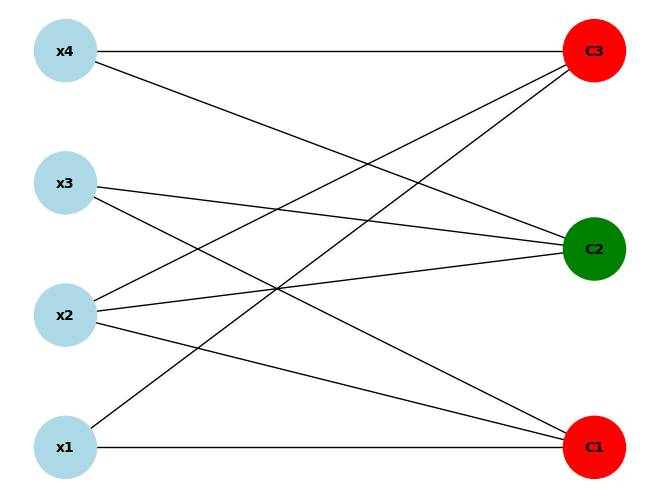

In [54]:
G,node_color = create_xorsat_graph(variables,constraints)
visualize_graph(G, node_color)

In [44]:

from networkx.algorithms import bipartite
b,t = bipartite.sets(G)
b 
t

{'C1', 'C2', 'C3'}

In [50]:
G.nodes()
type(G.edges(t))
#["C1"]
for i in G.edges(t):
    print(i[0])
        

('C1', 'x1')
('C1', 'x2')
('C1', 'x3')
('C2', 'x1')
('C2', 'x2')
('C2', 'x3')
('C3', 'x1')
('C3', 'x2')
('C3', 'x4')


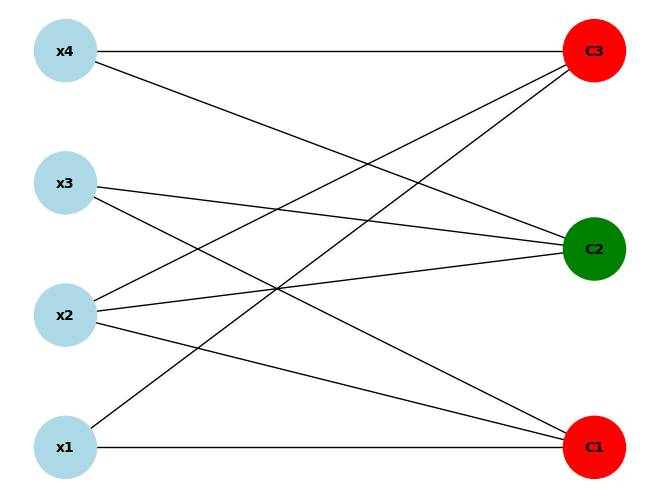

In [55]:
visualize_graph(G, node_color)

In [12]:
from qiskit import QuantumCircuit, Aer, transpile, ClassicalRegister
from qiskit.visualization import plot_gate_map, plot_error_map, plot_histogram
from qiskit.providers.fake_provider import FakeQuitoV2, FakeNairobiV2

In [153]:
A = np.array([[1,0,1,0,1,0],[1,0,0,0,1,1],[0,0,0,1,1,1],[1,1,1,0,0,0],[0,1,0,1,1,0],[0,1,0,0,1,1]])#,[0,1,0,1,1,0],[1,0,1,0,1,0]])
B = np.array([0,1,0,0,0,1])#,1,1])
print(np.linalg.inv(A)@(B))#.transpose()))

[ 0.33333333  0.33333333 -0.66666667 -0.66666667  0.33333333  0.33333333]


In [13]:
from qiskit import QuantumCircuit
import numpy as np

# dictionary to map the constrained SAT problem 
#('x1', 'x2', 'x3', 0),  # x1 ⊕ x2 ⊕ x3 = 0 (red)
#('x2', 'x3', 'x4', 1),  # x1 ⊕ x2 ⊕ x3 = 1 (yellow)
#('x1', 'x2', 'x4', 0)
#('x1', 'x3', 'x4', 0)

#prob_stat = {"012": 1,"013": 1,"123":-1}

#prob_stat = {"012": 1,"013": 1,"123": -1,"023":1 }
prob_stat = {"024": 1,"045":-1,"345": 1,"012":1,"134":1,"145":-1,"124":1,"013":1 }
prob_stat

{'024': 1,
 '045': -1,
 '345': 1,
 '012': 1,
 '134': 1,
 '145': -1,
 '124': 1,
 '013': 1}

In [14]:
def append_zzz_term(qc,qbits , gamma):
    q1, q2, q3 = [int(i) for i in qbits]
    qc.cx(q1,q2)
    qc.cx(q2,q3)
    qc.rz(2*gamma, q3)
    qc.cx(q2,q3)
    qc.cx(q1,q2)
    
def append_x_term(qc,q1,beta):
    qc.rx(2*beta,q1)
    

def append_cost_operator_circuit(qc, prob_stat, gamma):
    
    for i in prob_stat.keys():
        append_zzz_term(qc,i, gamma)

def append_mixer_operator_circuit(qc,Nvertices, beta):
    for i in range(Nvertices):
        append_x_term(qc,i, beta)
    return qc   
           
qc = QuantumCircuit(4)

#append_cost_operator_circuit(qc,prob_stat,gamma=np.pi/3)
#qc.draw()

append_mixer_operator_circuit(qc,4,np.pi/6).draw()

┌─────────┐
q_0: ┤ Rx(π/3) ├
     ├─────────┤
q_1: ┤ Rx(π/3) ├
     ├─────────┤
q_2: ┤ Rx(π/3) ├
     ├─────────┤
q_3: ┤ Rx(π/3) ├
     └─────────┘

In [15]:
def create_qaoa_circuit(prob_stat,  beta,gamma):
    assert(len(beta) ==len(gamma))
    p = len(beta)
    Nvertices = 6 # number of variables
    circ = QuantumCircuit(Nvertices)
    # initialize to all plus state
    circ.h(range(Nvertices))
    # apply p alternating layer of cost and mixer to build an qaoa circuit
    for i in range(p):
        append_cost_operator_circuit(circ,prob_stat,beta[i])
        circ.barrier()
        append_mixer_operator_circuit(circ,Nvertices,gamma[i])
        circ.barrier()
    #circ.barrier()
    circ.measure_all()
    return circ

In [16]:
qc =create_qaoa_circuit(prob_stat, beta = [np.pi/3],gamma=[np.pi/2])
qc.draw()

┌───┐                                                                »
   q_0: ┤ H ├──■──────────────────────────■────■──────────────────────────■──»
        ├───┤  │                          │    │                          │  »
   q_1: ┤ H ├──┼──────────────────────────┼────┼──────────────────────────┼──»
        ├───┤┌─┴─┐                      ┌─┴─┐  │                          │  »
   q_2: ┤ H ├┤ X ├──■────────────────■──┤ X ├──┼──────────────────────────┼──»
        ├───┤└───┘  │                │  └───┘  │                          │  »
   q_3: ┤ H ├───────┼────────────────┼─────────┼──────────────────────────┼──»
        ├───┤     ┌─┴─┐┌──────────┐┌─┴─┐     ┌─┴─┐                      ┌─┴─┐»
   q_4: ┤ H ├─────┤ X ├┤ Rz(2π/3) ├┤ X ├─────┤ X ├──■────────────────■──┤ X ├»
        ├───┤     └───┘└──────────┘└───┘     └───┘┌─┴─┐┌──────────┐┌─┴─┐└───┘»
   q_5: ┤ H ├─────────────────────────────────────┤ X ├┤ Rz(2π/3) ├┤ X ├─────»
        └───┘                                     └───┘└──────────┘└───┘     »
meas: 6/═════════════════════════════════════════════════════════════════════»
                                                                             »
«                                                                             »
«   q_0: ──■──────────────────────────■───────────────────────────────────────»
«        ┌─┴─┐                      ┌─┴─┐                                     »
«   q_1: ┤ X ├──■────────────────■──┤ X ├──■──────────────────────────■────■──»
«        └───┘┌─┴─┐┌──────────┐┌─┴─┐└───┘  │                          │    │  »
«   q_2: ─────┤ X ├┤ Rz(2π/3) ├┤ X ├───────┼──────────────────────────┼────┼──»
«             └───┘└──────────┘└───┘     ┌─┴─┐                      ┌─┴─┐  │  »
«   q_3: ──■──────────────────────────■──┤ X ├──■────────────────■──┤ X ├──┼──»
«        ┌─┴─┐                      ┌─┴─┐└───┘┌─┴─┐┌──────────┐┌─┴─┐└───┘┌─┴─┐»
«   q_4: ┤ X ├──■────────────────■──┤ X ├─────┤ X ├┤ Rz(2π/3) ├┤ X ├─────┤ X ├»
«        └───┘┌─┴─┐┌──────────┐┌─┴─┐└───┘     └───┘└──────────┘└───┘     └───┘»
«   q_5: ─────┤ X ├┤ Rz(2π/3) ├┤ X ├──────────────────────────────────────────»
«             └───┘└──────────┘└───┘                                          »
«meas: 6/═════════════════════════════════════════════════════════════════════»
«                                                                             »
«                                                                             »
«   q_0: ─────────────────────────────────────────────────────────────■───────»
«                                                                   ┌─┴─┐     »
«   q_1: ────────────────────────■────■──────────────────────────■──┤ X ├──■──»
«                                │  ┌─┴─┐                      ┌─┴─┐└───┘  │  »
«   q_2: ────────────────────────┼──┤ X ├──■────────────────■──┤ X ├───────┼──»
«                                │  └───┘  │                │  └───┘     ┌─┴─┐»
«   q_3: ────────────────────────┼─────────┼────────────────┼────────────┤ X ├»
«                              ┌─┴─┐     ┌─┴─┐┌──────────┐┌─┴─┐          └───┘»
«   q_4: ──■────────────────■──┤ X ├─────┤ X ├┤ Rz(2π/3) ├┤ X ├───────────────»
«        ┌─┴─┐┌──────────┐┌─┴─┐└───┘     └───┘└──────────┘└───┘               »
«   q_5: ┤ X ├┤ Rz(2π/3) ├┤ X ├───────────────────────────────────────────────»
«        └───┘└──────────┘└───┘                                               »
«meas: 6/═════════════════════════════════════════════════════════════════════»
«                                                                             »
«                               ░ ┌───────┐ ░  ░ ┌─┐               
«   q_0: ───────────────────■───░─┤ Rx(π) ├─░──░─┤M├───────────────
«                         ┌─┴─┐ ░ ├───────┤ ░  ░ └╥┘┌─┐            
«   q_1: ──────────────■──┤ X ├─░─┤ Rx(π) ├─░──░──╫─┤M├────────────
«                      │  └───┘ ░ ├───────┤ ░  ░  ║ └╥┘┌─┐         
«   q_2: ──────────────┼────────░─┤ Rx(π) ├─░──░──╫──╫─┤M├─────────
«        ┌─────

In [17]:
prob_stat

{'024': 1,
 '045': -1,
 '345': 1,
 '012': 1,
 '134': 1,
 '145': -1,
 '124': 1,
 '013': 1}

In [18]:
def invert_counts(counts):
    return {k[::-1]:v for k, v in counts.items()}

cc = {'111101': 12, '110010': 9}

invert_counts(cc)

{'101111': 12, '010011': 9}

In [19]:
import matplotlib.pyplot as plt
from collections import defaultdict
from operator import itemgetter
from scipy.optimize import minimize
from qiskit import QuantumCircuit, transpile
#from qiskit.providers.fake_provider import GenericBackendV2

def invert_counts(counts):
    return {k[::-1]:v for k, v in counts.items()}

backend = FakeNairobiV2() #GenericBackendV2(num_qubits=4)
job = backend.run(qc)
result = job.result()
print(invert_counts(result.get_counts()))

{'111111': 14, '011011': 11, '110001': 19, '001010': 19, '010101': 17, '111100': 28, '001101': 17, '011111': 11, '000010': 13, '110110': 17, '111110': 19, '110010': 12, '101001': 24, '110101': 18, '111011': 10, '001111': 14, '100010': 16, '011000': 24, '101101': 14, '000000': 13, '011110': 10, '010001': 15, '000111': 18, '010111': 15, '001100': 17, '101111': 16, '000100': 12, '011001': 19, '000001': 23, '110000': 19, '000011': 18, '100011': 9, '111001': 15, '001000': 18, '111010': 20, '000110': 8, '110100': 18, '110111': 17, '011100': 19, '100101': 14, '111101': 13, '011101': 17, '011010': 14, '010010': 13, '101010': 13, '100001': 16, '100100': 14, '100000': 16, '101110': 18, '010110': 15, '001001': 17, '001011': 19, '101000': 20, '110011': 18, '001110': 19, '010011': 13, '010100': 14, '100111': 9, '101100': 18, '101011': 19, '010000': 19, '000101': 18, '100110': 10, '111000': 12}


In [80]:
prob_stat

{'024': 1,
 '045': -1,
 '345': 1,
 '012': 1,
 '134': 1,
 '145': -1,
 '124': 1,
 '013': 1}

In [20]:

def compute_satisfied_constraints(bitstr = '000000'):#, bitcount = 1):
    
    const_sat = 0
    for key in prob_stat.keys():
        bit = [int(bitstr[int(j)]) for j in key]
        
        if (-1)**((bit[0] +bit[1]+bit[2])%2) ==(prob_stat[key]):
            const_sat+=1
        
    #print(const_sat)
    return const_sat

compute_satisfied_constraints()

6

In [21]:

def compute_Hijk(bitstr = '110011'):#, bitcount = 1):
    tot_hijk = 0
    
    for key in prob_stat.keys():
        #print(prob_stat)
        #key_list = [int(i) for i in key]
        #print(key_list)
        bit = [int(bitstr[int(j)]) for j in key]

        hijk_val =1
        for p in bit:
            #print("p =", p)
            hijk_val*=-prob_stat[key]*(-1)**p
        # print(hijk_val)
        tot_hijk+=hijk_val#*bitcount
    
    return tot_hijk
        

compute_Hijk()
compute_Hijk(bitstr="110011")
compute_Hijk(bitstr="100000")

0

In [24]:
# H = - \sum Vijk zizjzk
def compute_max_xorsat_energy(counts =invert_counts(result.get_counts()) ):
    energy = 0
    total_count =0
    for meas, meas_count in counts.items():
        obj_4_meas = compute_Hijk(bitstr=meas)#,bitcount=meas_count)
        #print(meas,"obj_4_meas", obj_4_meas)
        energy += obj_4_meas*meas_count
        # print(energy)
        total_count+=meas_count
    #print(energy, total_count)
    return energy/total_count
compute_max_xorsat_energy()

-0.01171875

In [25]:
shots = 100000 #100000

In [26]:

def get_black_box_objective(p):
    backend = FakeNairobiV2()#FakeQuitoV2() #GenericBackendV2(num_qubits=4)
    def f(theta):
        # let's assume first half is betas, second half is gammas
        beta = theta[:p]
        gamma = theta[p:]
        qc = create_qaoa_circuit(prob_stat,beta, gamma)
        #print(qc)
        counts = backend.run(transpile(qc), shots = shots).result().get_counts()
        # return the energy
        energy = compute_max_xorsat_energy(invert_counts(counts=counts))
        obj_cost.append(energy)
        print("energy",energy)
        return energy
    return f

In [28]:
def compute_max_xorsat_energy_lowest10(counts =invert_counts(counts=result.get_counts())):
    low_10 = defaultdict()
    
    energy = 0
    total_count = 0
    for meas, meas_count in counts.items():
        obj_4_meas = compute_Hijk(bitstr=meas)
        low_10[meas] = (meas_count,obj_4_meas)

    energy_10 = dict(sorted(low_10.items(), key=lambda x:x[1][1])[:7])
    print(energy_10)
    for basis, val in energy_10.items():
        energy += val[1]* val[0]
        total_count += val[0]
        #print(energy, total_count)
        
    return energy/(7*total_count) #, energy/shots
compute_max_xorsat_energy_lowest10()

{'110011': (18, -8), '000001': (23, -6), '000000': (13, -4), '011101': (17, -4), '101110': (18, -4), '001110': (19, -4), '000101': (18, -4)}


-0.7052154195011338

In [29]:
def cost_function_cVar(p):
    backend = FakeNairobiV2()#FakeQuitoV2() #GenericBackendV2(num_qubits=4)
    def f(theta):
        # let's assume first half is betas, second half is gammas
        beta = theta[:p]
        gamma = theta[p:]
        qc = create_qaoa_circuit(prob_stat,beta, gamma)
        #print(qc)
        counts = backend.run(transpile(qc), shots = shots).result().get_counts()
        # return the energy
        energy = compute_max_xorsat_energy_lowest10(invert_counts(counts=counts))
        obj_cost.append(energy)
        print("energy",energy)
        return energy
    return f 

In [208]:
2**6

64

In [384]:
optimal_p13

array([ 3.10792366, -0.11430542,  1.61779401,  3.69955177,  2.73295043,
        0.91074827,  3.69196212,  2.28413125,  2.31614937,  4.35898739,
        1.65920174,  2.8209266 ,  4.48222373,  2.53458086,  1.06082758,
        1.70543068,  3.18733952,  0.78535542,  2.8818705 ,  0.47562741,
        0.19759593,  3.18477498,  3.11019851,  0.16718474,  1.49408089,
        1.38275996])

## Main conclusion is to have more shots to approach the right answer. 
Shouldn't for larger p values, we get closer to the solution anyway and hence should require less shots
### TODO 
### try the state-vector algorithm

[2.5637967  3.47032884 3.31950937 2.83458509]
{'110011': (6131, -8), '000001': (3452, -6), '000000': (4641, -4), '101110': (4151, -4), '001110': (1066, -4), '111000': (774, -4), '011101': (2330, -4)}
energy -0.7705731394354148
{'110011': (3084, -8), '000001': (1048, -6), '111000': (1562, -4), '011101': (623, -4), '000101': (3986, -4), '000000': (3570, -4), '101110': (1454, -4)}
energy -0.7059437593788739
{'110011': (4372, -8), '000001': (1359, -6), '011101': (366, -4), '000000': (1669, -4), '000101': (4617, -4), '001110': (384, -4), '101110': (439, -4)}
energy -0.7900088704268623
{'110011': (2929, -8), '000001': (1913, -6), '001110': (775, -4), '011101': (636, -4), '101110': (920, -4), '000101': (823, -4), '000000': (1192, -4)}
energy -0.813079171590273
{'110011': (1699, -8), '000001': (1108, -6), '001110': (599, -4), '000000': (1969, -4), '000101': (2075, -4), '011101': (1586, -4), '101110': (1203, -4)}
energy -0.697166296931899
{'110011': (420, -8), '000001': (943, -6), '011101': (15

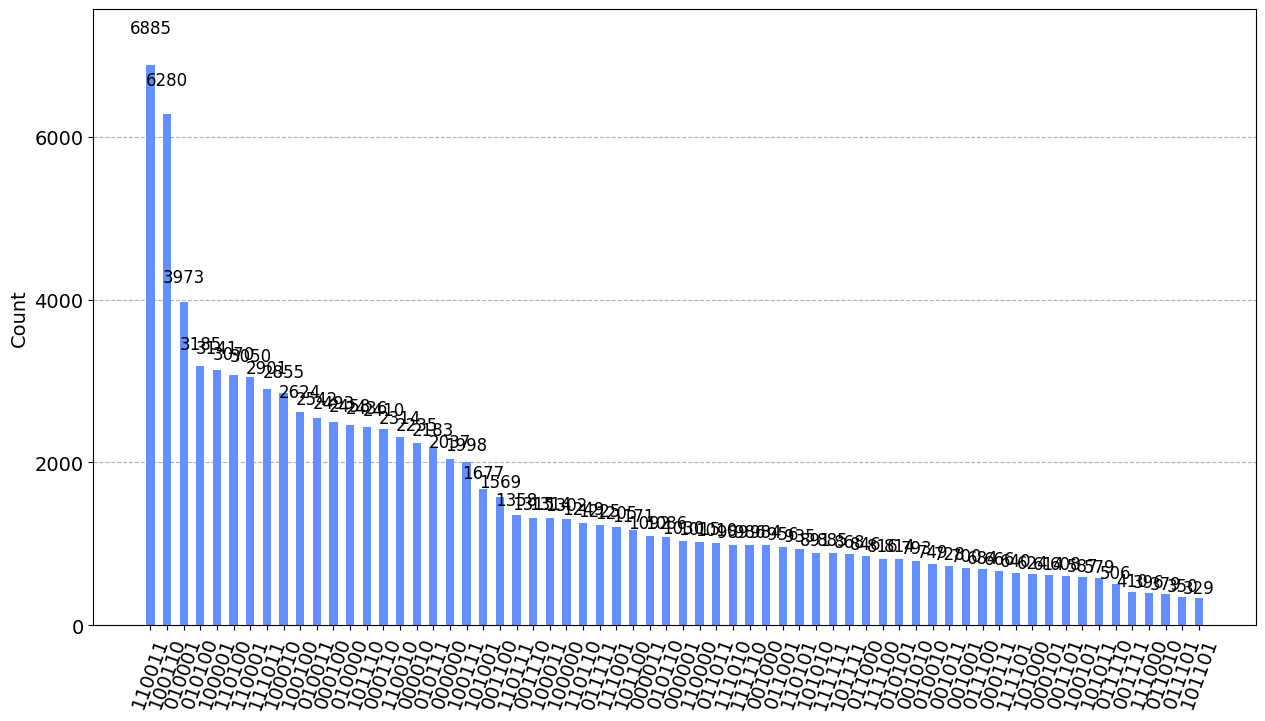

In [229]:
p = 2
obj_cost = []
obj =  cost_function_cVar(p) #get_black_box_objective(p) #
#np.random.seed(12345)
init_point = np.array([2.5637967 , 3.47032884, 3.31950937, 2.83458509]) 
#np.random.uniform(0,np.pi, 2*p)#np.random.uniform(0,np.pi, 2*p)#np.array([2.5637967 , 3.47032884, 3.31950937, 2.83458509]) #np.array([2.5637967 , 3.47032884, 3.31950937, 2.83458509])
print(init_point)
#np.random.uniform(0,np.pi, 2*p)#np.random.randint(low = -np.pi/3, high =np.pi/4, size = 2*p)
#np.array(np.random.random_sample(size = 2*p))
#
#np.array([np.pi/8, np.pi/8 ,np.pi/8, np.pi/8,np.pi/8,
#       np.pi/4,np.pi/4 ,np.pi/4 ,np.pi/4, np.pi/4 ])
#np.array([0.81069872, 2.2067517 , 0.83830696, 2.15579759, 0.37060699,
#       2.42068091, 6.1575306 , 2.2453419 , 3.85060091, 6.137845  ])

# We are going to limit the number of iterations to 2500 
res_sample = minimize(obj, init_point, method='COBYLA', options={'maxiter':5000,'disp': True})
print(res_sample)

optimal_theta = res_sample['x']
qc = create_qaoa_circuit(prob_stat, optimal_theta[:p], optimal_theta[p:])
counts = invert_counts(backend.run(qc, shots = 100000).result().get_counts())
print(counts["110011"])
plot_histogram(counts,figsize=(15,8),sort='value_desc')

In [230]:
optimal_params = res_sample['x']
print(optimal_params)
res_sample['x']

[2.31864502 3.79223906 4.34414373 2.7076192 ]


array([2.31864502, 3.79223906, 4.34414373, 2.7076192 ])

In [227]:
# with full cost fucntion 

optimal_params = res_sample['x']
print(optimal_params)
res_sample['x']

[2.56214397 3.47678176 3.31811444 2.80635364]


array([2.56214397, 3.47678176, 3.31811444, 2.80635364])

/tmp/ipykernel_7135/4048088934.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.get_children()[int(p)].set_color("tab:pink")


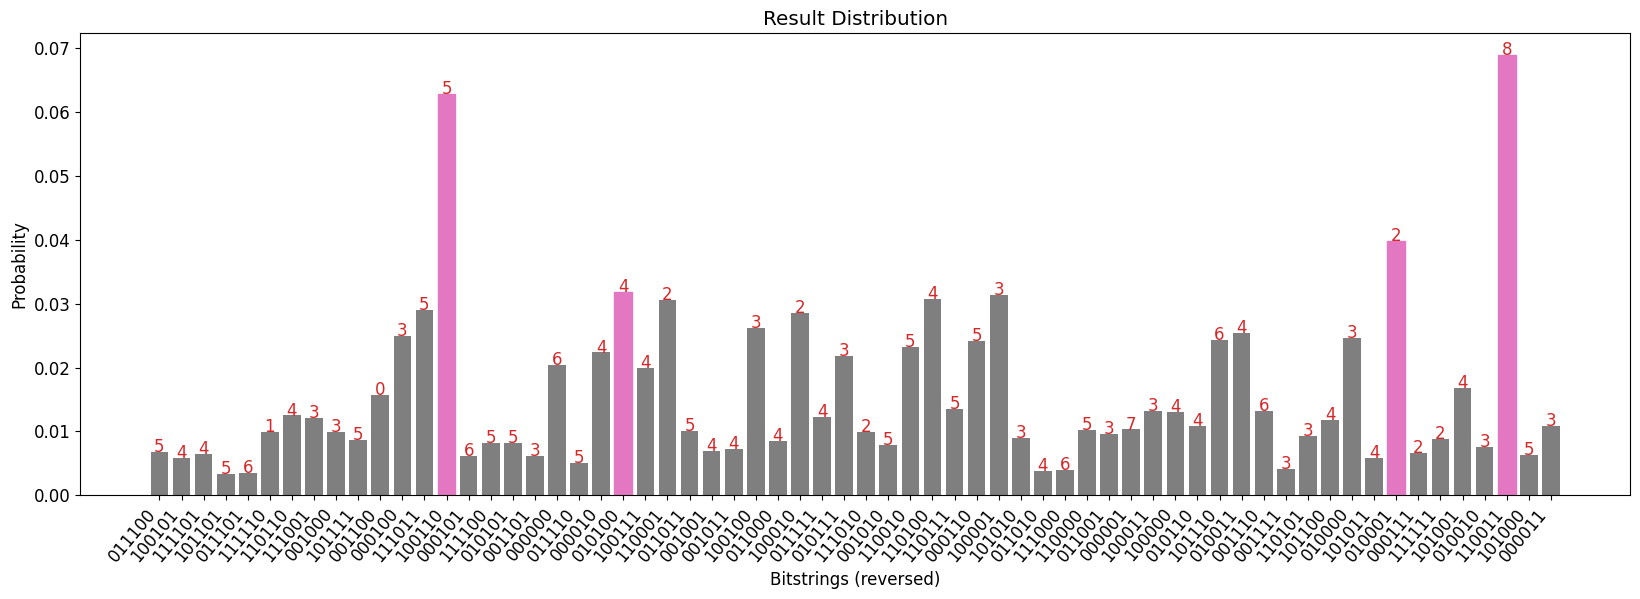

In [231]:
final_dist_prob = {key:val/shots for key,val in counts.items()}
#final_dist_prob

import matplotlib

matplotlib.rcParams.update({"font.size":12})
final = final_dist_prob
values = np.abs(list(final.values()))
top_4 = sorted(values, reverse=True)[:4]
position = []
for val in top_4:
    position.append(np.where(values == val)[0])
    
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(1, 1, 1)

plt.xticks(rotation=50, ha='right')
plt.title("Result Distribution")
plt.xlabel("Bitstrings (reversed)")
plt.ylabel("Probability")

ax.bar(list(final.keys()), list(final.values()), color="tab:grey")
#print(ax.get_children())
for p in position:    
    ax.get_children()[int(p)].set_color("tab:pink")
for i in range(len(list(final.keys()))):
    plt.text(i, list(final.values())[i],compute_satisfied_constraints(list(final.keys())[i]), ha ='center',color="tab:red")
plt.show()

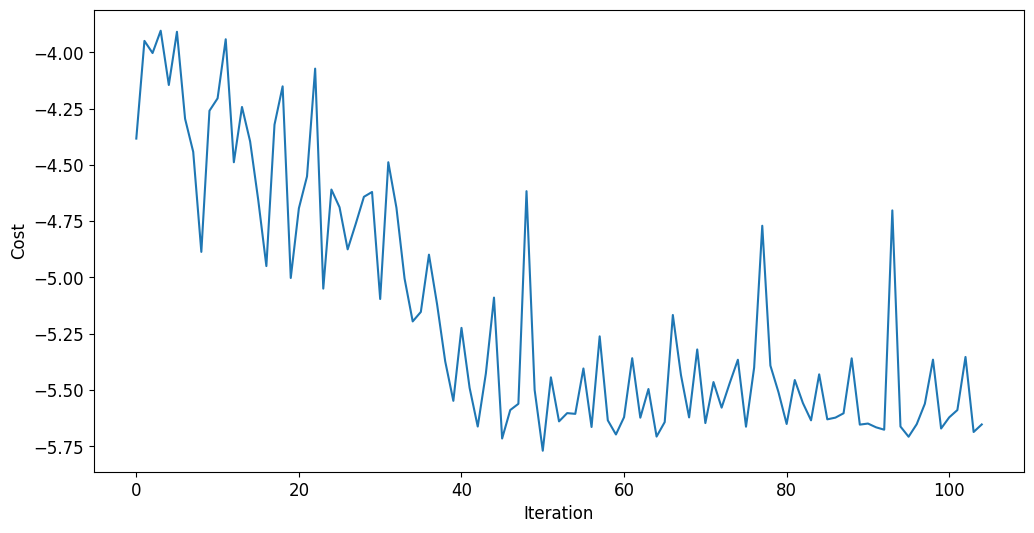

In [184]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(obj_cost)
#plt.plot(obj_cost_random )
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

/tmp/ipykernel_7135/4048088934.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.get_children()[int(p)].set_color("tab:pink")


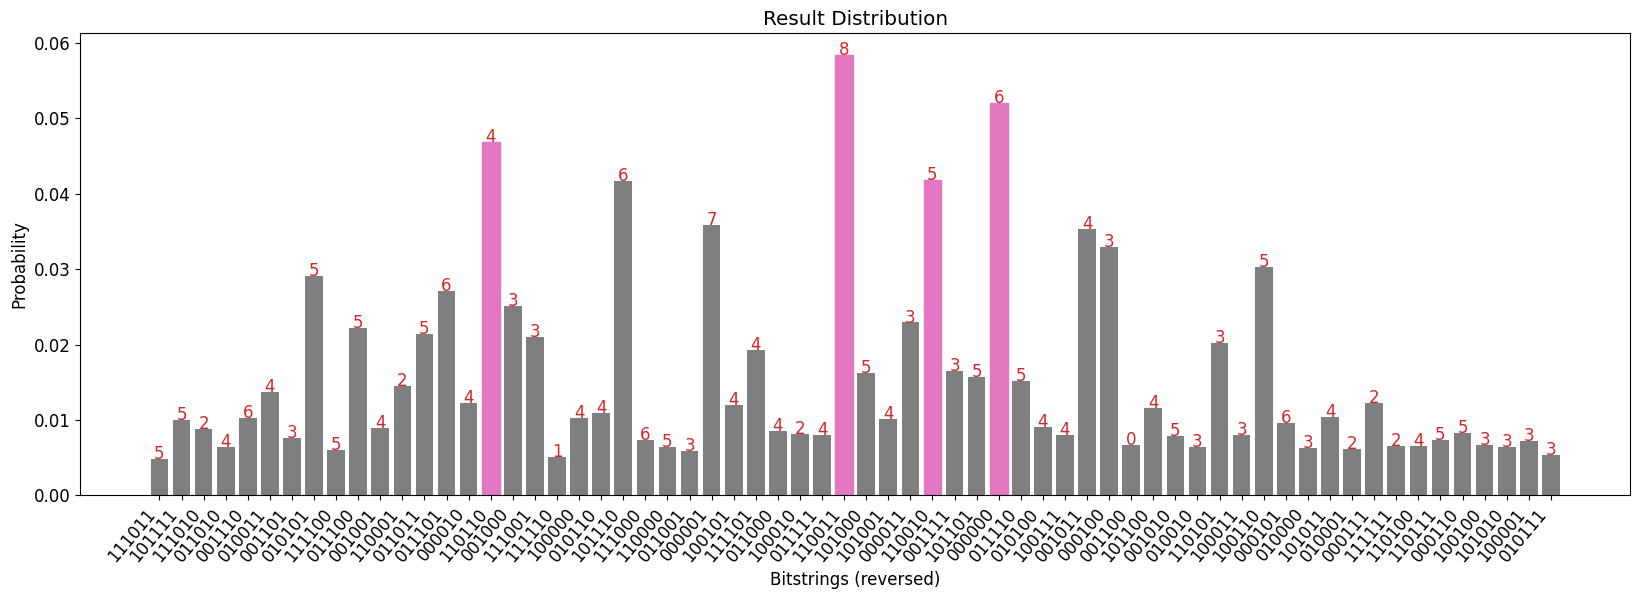

In [87]:
final_dist_prob = {key:val/shots for key,val in counts.items()}
#final_dist_prob

import matplotlib

matplotlib.rcParams.update({"font.size":12})
final = final_dist_prob
values = np.abs(list(final.values()))
top_4 = sorted(values, reverse=True)[:4]
position = []
for val in top_4:
    position.append(np.where(values == val)[0])
    
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(1, 1, 1)

plt.xticks(rotation=50, ha='right')
plt.title("Result Distribution")
plt.xlabel("Bitstrings (reversed)")
plt.ylabel("Probability")

ax.bar(list(final.keys()), list(final.values()), color="tab:grey")
#print(ax.get_children())
for p in position:    
    ax.get_children()[int(p)].set_color("tab:pink")
for i in range(len(list(final.keys()))):
    plt.text(i, list(final.values())[i],compute_satisfied_constraints(list(final.keys())[i]), ha ='center',color="tab:red")
plt.show()

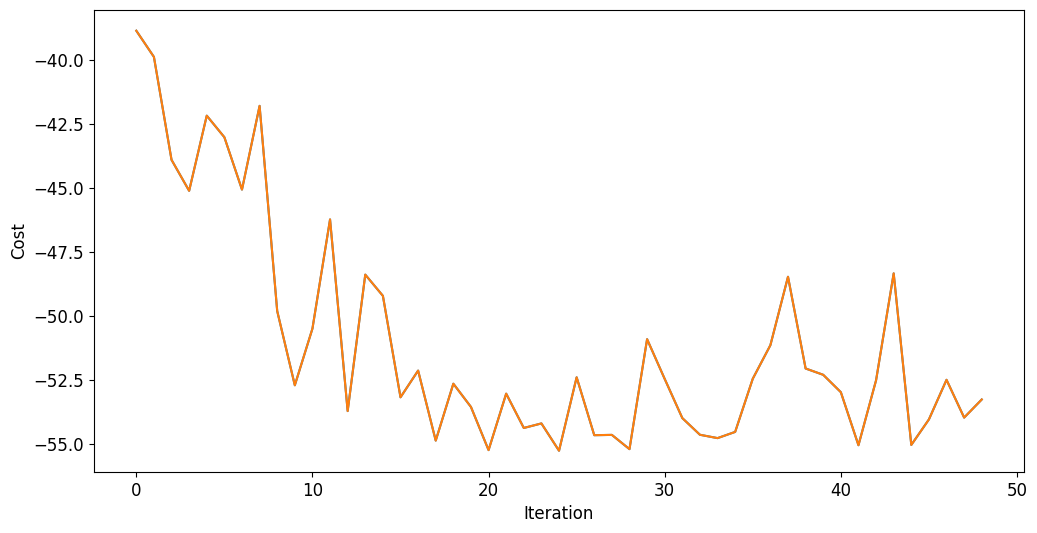

In [164]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(obj_cost)
plt.plot(obj_cost_random )
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

In [161]:
res_sample['x']

array([2.21756599, 1.78958985, 0.18150748, 0.72823213])

In [463]:
res_sample['x']

array([2.5637967 , 3.47032884, 3.31950937, 2.83458509])

[0.37602896 2.96097255 2.59271668 2.14907856 1.35935531 3.57763063
 1.20907608 0.15670827 1.75872055 1.51064265 2.28535716 1.13617704
 2.72844447 1.47289328 1.88009195 2.09666862 1.39859969 1.9758639
 0.52712297 2.23786823 1.2545413  0.63714109 0.85729793 0.79527026
 0.48299064 2.44975208 1.82375899 0.44511882 2.11031946 1.2291072
 1.88341806 2.22046471 0.95244688 0.64719141 0.69149184 0.31195829
 0.1282841  0.17111384 0.81932916 0.67460567]
108778


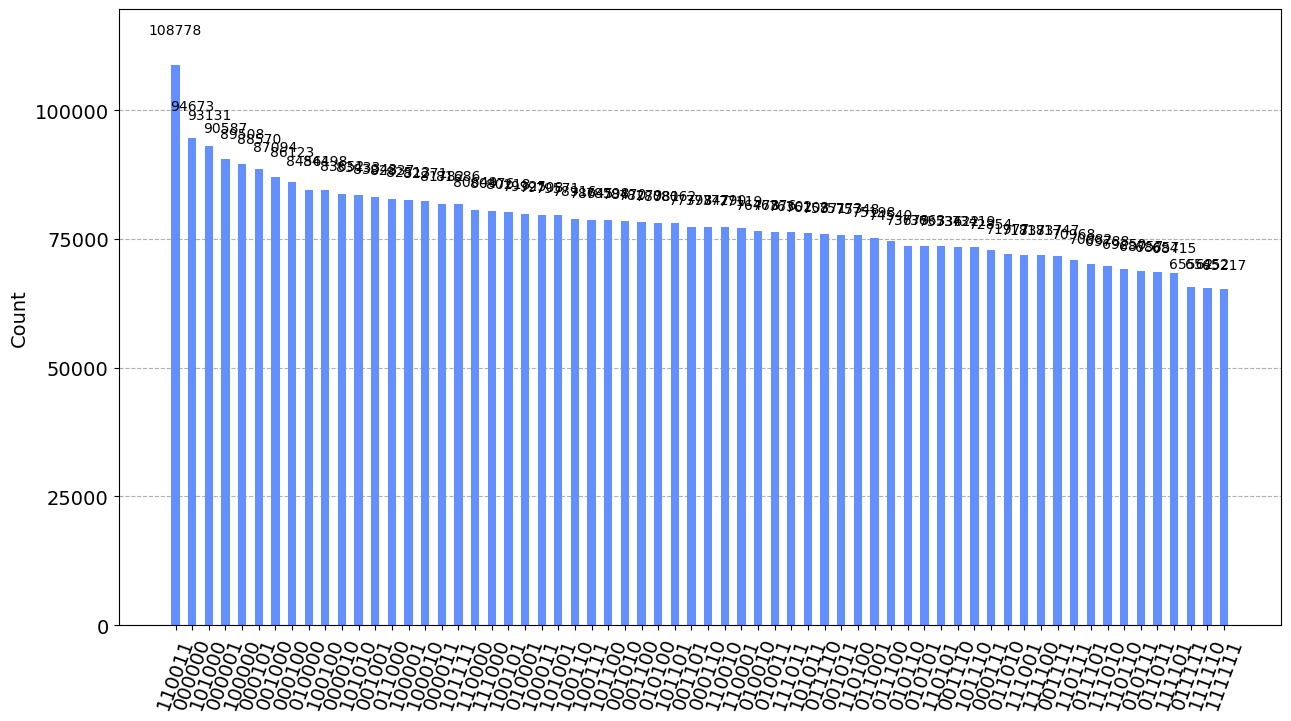

In [417]:
print(optimal_theta)
qc = create_qaoa_circuit(prob_stat, optimal_theta[:p], optimal_theta[p:])
counts = invert_counts(backend.run(qc, shots = 5000000).result().get_counts())
print(counts["110011"])

plot_histogram(counts,figsize=(15,8),sort='value_desc')

In [413]:
optimal_p15 = res_sample['x']
optimal_p15

array([ 1.32597242,  2.74745697,  3.03879865,  0.81897799,  3.12841319,
        2.75133142,  2.89321433,  0.77508901,  2.58997642,  3.74785634,
        3.45894927, -0.05015984, -0.10195131,  1.30153515,  3.47790455,
        0.17737481,  0.51363389,  2.345905  ,  0.4877005 ,  2.10090131,
        1.37495115,  0.23411011,  2.40942993,  2.55639146,  0.24050789,
        0.05389135,  2.47971592,  0.42899316,  1.37099085,  1.48301703])

In [404]:
res_sample['x'] # this is also for p=14 and gives correct results 
optimal_p14 = np.array([2.46717426, 3.00818821, 1.98738215, 0.51943302, 1.47798483,
       2.26687907, 2.69527222, 3.59806206, 1.25363317, 0.81382737,
       1.84748027, 0.81099626, 0.56798842, 2.2037671 , 2.46831956,
       1.67773372, 2.85703099, 2.03007325, 3.00998746, 1.66513797,
       1.17659221, 2.18842567, 1.55256541, 0.67794328, 0.81676293,
       2.49437915, 1.56425585, 2.90167423])
optimal_p14

array([2.46717426, 3.00818821, 1.98738215, 0.51943302, 1.47798483,
       2.26687907, 2.69527222, 3.59806206, 1.25363317, 0.81382737,
       1.84748027, 0.81099626, 0.56798842, 2.2037671 , 2.46831956,
       1.67773372, 2.85703099, 2.03007325, 3.00998746, 1.66513797,
       1.17659221, 2.18842567, 1.55256541, 0.67794328, 0.81676293,
       2.49437915, 1.56425585, 2.90167423])

In [402]:
res_sample['x'] # this is also for p=13 and gives correct results

array([4.04806048, 2.21419266, 2.44210546, 0.51986969, 1.1392608 ,
       2.42259302, 2.82583013, 1.05090573, 1.61466065, 1.58614484,
       1.59040805, 0.16026511, 2.85269823, 2.04083924, 2.71608229,
       1.33956888, 2.45812429, 0.34441843, 0.6721392 , 1.0512721 ,
       1.29775632, 1.07767139, 2.05528048, 0.68173842, 1.4584624 ,
       0.28035532])

In [397]:
optimal_p13 = res_sample['x']
optimal_p13

array([0.76972186, 0.21614259, 2.06634391, 3.13733993, 0.35528609,
       2.34553922, 1.56192651, 3.12972297, 0.81404752, 2.58734145,
       2.71366819, 1.59917998, 2.60264055, 2.32289179, 0.47070704,
       2.11667147, 2.42553559, 2.60596714, 1.2669153 , 2.11868359,
       1.28007435, 3.67365226, 3.13862596, 2.9125232 , 2.14772309,
       2.9263169 ])

In [391]:
p = 12
obj = get_black_box_objective(p)
init_point =optimal_p12
# np.array([ 3.11565228, -0.12337345,  1.63087269,  3.69366458,  2.71891602,
#         0.87744704,  3.73359457,  2.30635508,  2.31134278,  4.53427049,
#         1.44036469,  2.81236765,  4.48644134,  3.54022047,  1.01734194,
#         1.59339517,  3.10740361,  0.79416291,  2.89232379,  0.48890411,
#         0.18858554,  3.1683361 ,  3.07631809,  0.15980239,  1.49874631,
#         1.39182307])
#np.array([2.30302899, 0.07125167, 1.388045  , 3.34961009, 2.75406291,0.72737635, 2.59627503, 
# 1.94457182, 2.67098935, 4.01411024,1.48831868,2.38280768, 0.16124153, 1.92063935,3.28411534, 0.85480143, 2.71213942, 0.66752842, 0.22987818,3.39335127, 3.23494977, 0.16921106 ])
#np.random.uniform(0,np.pi, 2*p)#np.random.randint(low = -np.pi/3, high =np.pi/4, size = 2*p)
#np.array(np.random.random_sample(size = 2*p))
#
#np.array([np.pi/8, np.pi/8 ,np.pi/8, np.pi/8,np.pi/8,
#       np.pi/4,np.pi/4 ,np.pi/4 ,np.pi/4, np.pi/4 ])
#np.array([0.81069872, 2.2067517 , 0.83830696, 2.15579759, 0.37060699,
#       2.42068091, 6.1575306 , 2.2453419 , 3.85060091, 6.137845  ])

# We are going to limit the number of iterations to 2500
res_sample = minimize(obj, init_point, method='COBYLA', options={'maxiter':5000,'disp': True})
print(res_sample)



energy -0.543424
energy 0.103764
energy -0.047332
energy -0.065336
energy -0.321592
energy -0.298016
energy 0.05672
energy 0.054748
energy -0.265644
energy -0.383596
energy -0.315748
energy -0.459264
energy -0.524832
energy 0.008496
energy 0.023464
energy 0.067016
energy 0.050752
energy 0.107012
energy -0.212892
energy 0.17212
energy 0.043496
energy 0.075168
energy -0.031708
energy 0.142952
energy 0.065708
energy -0.018548
energy -0.044252
energy -0.295684
energy -0.51422
energy -0.385
energy -0.517548
energy -0.138284
energy -0.492088
energy -0.26456
energy -0.479636
energy -0.278568
energy -0.514256
energy -0.371724
energy -0.54324
energy -0.494096
energy -0.508584
energy -0.455124
energy -0.463592
energy -0.345688
energy -0.488956
energy -0.345708
energy -0.494556
energy -0.363808
energy -0.506816
energy -0.3593
energy -0.401336
energy -0.492996
energy -0.528628
energy -0.541328
energy -0.51552
energy -0.52956
energy -0.528352
energy -0.542452
energy -0.53202
energy -0.53344
energy 

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -0.555664
       x: [ 2.302e+00  6.391e-02 ...  1.695e-01  1.505e+00]
    nfev: 208
   maxcv: 0.0


   NFVALS =  208   F =-5.556640E-01    MAXCV = 0.000000E+00
   X = 2.301794E+00   6.390617E-02   1.391126E+00   3.335771E+00   2.755631E+00
       7.308807E-01   2.595325E+00   1.940078E+00   2.667717E+00   4.015630E+00
       1.484335E+00   2.743370E+00   2.410397E+00   1.595766E-01   1.919923E+00
       3.285843E+00   8.548811E-01   2.710971E+00   6.660629E-01   2.299194E-01
       3.392940E+00   3.235908E+00   1.694764E-01   1.505281E+00


In [389]:
res_sample['x'] #-0.6

array([ 3.11371711, -0.09466241,  1.58340268,  3.6838201 ,  2.72497401,
        0.86795906,  3.73990467,  2.29547298,  2.31599684,  4.52399363,
        1.44630631,  2.80542199,  4.49540393,  3.30137491,  1.90525065,
        1.59307993,  3.10578053,  0.79545892,  2.89046525,  0.54433052,
        0.18698878,  3.16725874,  3.07572282,  0.15851524,  1.49749799,
        1.39083507])

In [378]:
optimal_p11 = res_sample['x']
optimal_p11

array([ 3.21697585, -0.18236952,  1.13176884,  3.28311388,  2.27860872,
        0.86860155,  3.83037935,  2.05870431,  2.62121605,  4.01334712,
        2.61062444,  3.34684404,  0.1193555 ,  1.80001246,  3.40698521,
        0.75127124,  2.60242968,  0.79615854,  0.48103429,  3.49698763,
        3.12878161,  0.08309016])

In [374]:
optimal_p12 = res_sample['x']
optimal_p12

array([2.30302899, 0.07125167, 1.388045  , 3.34961009, 2.75406291,
       0.72737635, 2.59627503, 1.94457182, 2.67098935, 4.01411024,
       1.48831868, 2.75742891, 2.38280768, 0.16124153, 1.92063935,
       3.28411534, 0.85480143, 2.71213942, 0.66752842, 0.22987818,
       3.39335127, 3.23494977, 0.16921106, 1.5116568 ])

In [341]:
optimal_p10 = res_sample['x']
optimal_p10

array([ 1.37655708,  2.50108479,  0.9888627 ,  1.51361233,  3.9454176 ,
        0.8488259 ,  0.02636498, -0.00622211,  0.40840173,  0.47821508,
        2.72009591,  2.67643376,  1.47227738,  0.45245005,  0.49657922,
        0.24570488,  0.98997904,  1.1178083 ,  0.34180066,  3.2828497 ])

In [353]:
res_sample['x']

array([ 3.06201569,  3.56495205,  1.22226367,  2.90736731,  2.06995591,
        0.8163617 ,  2.38226042,  0.85707172,  2.94731754,  3.37047613,
        2.65525258,  2.47364417,  4.03804538,  1.4453417 , -0.24771728,
        1.61378715, -0.10342437,  1.51508253,  2.04117369,  1.23271793,
        2.14222912,  2.02528089])

60480


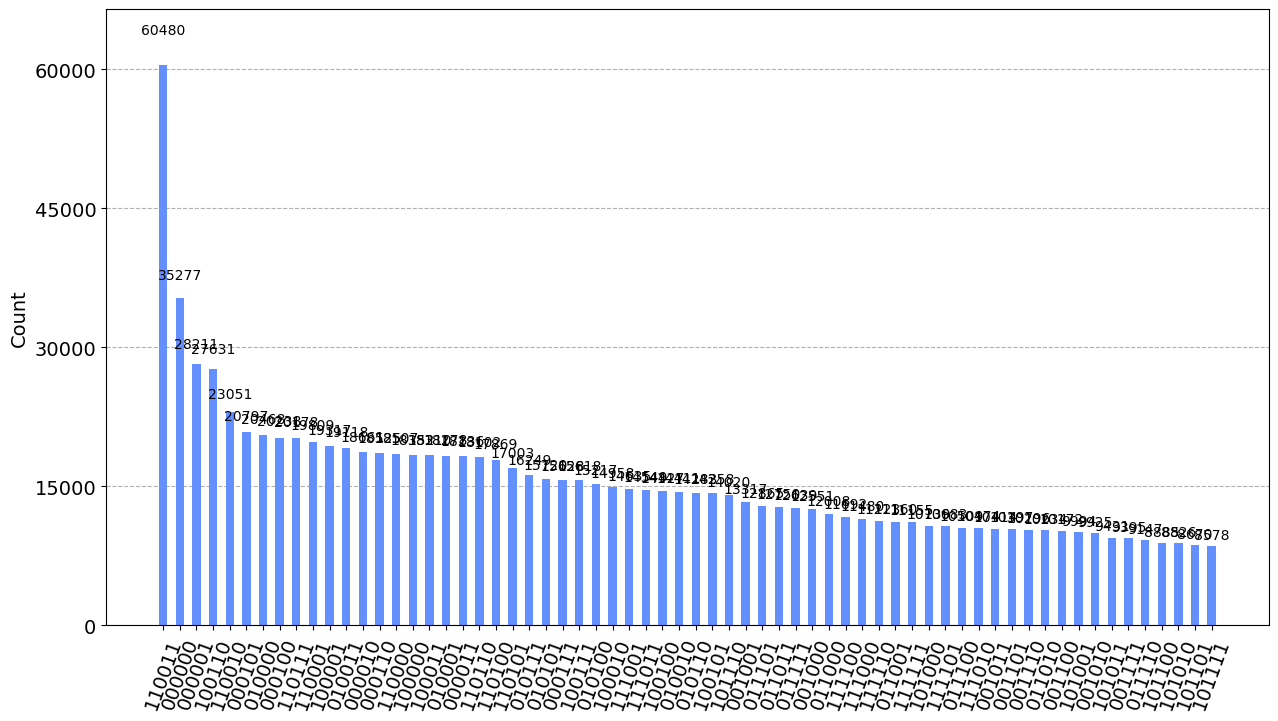

In [392]:
optimal_theta = res_sample['x']
qc = create_qaoa_circuit(prob_stat, optimal_theta[:p], optimal_theta[p:])
counts = invert_counts(backend.run(qc, shots = 1000000).result().get_counts())
print(counts["110011"])

plot_histogram(counts,figsize=(15,8),sort='value_desc')

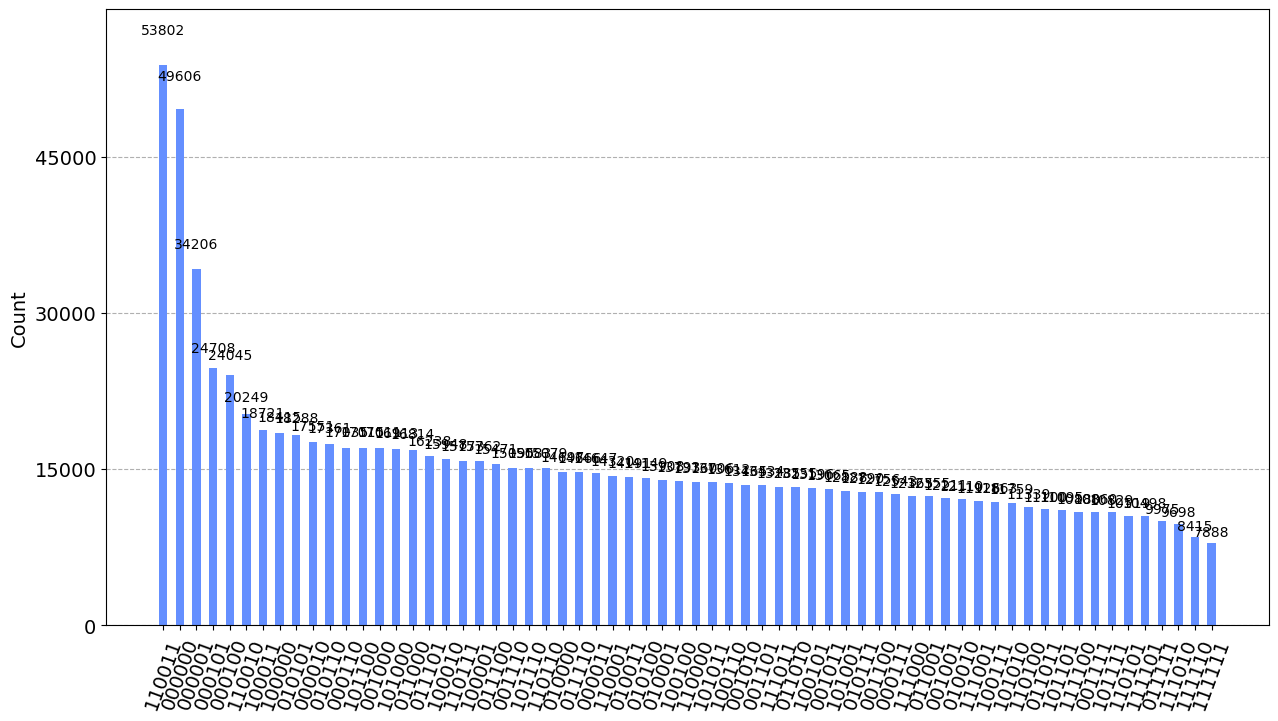

In [380]:
from qiskit.visualization import plot_histogram

plot_histogram(counts,figsize=(15,8),sort='value_desc')

<BarContainer object of 9 artists>

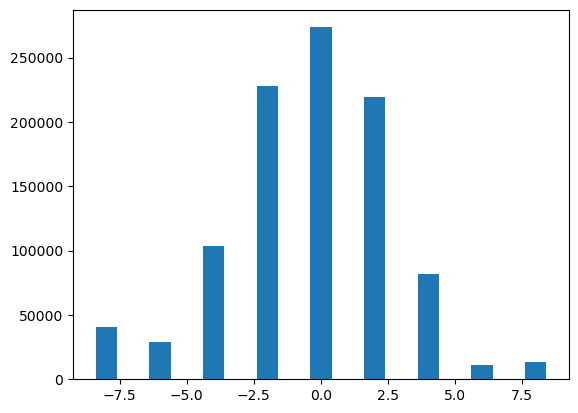

In [297]:
energies = defaultdict(int)
for k, v in counts.items():
    energies[compute_Hijk(k)] += v
    
x,y = zip(*energies.items())
plt.bar(x,y)


In [ ]:
#TODO 
# Thoroughly check the little-endian and big-endian of the counts used 
#make a dictionary with keys as vars and values as Vijk aka constraints and then we can apply gates to the respective qubits 
# try a different prob_stat as in 4 constraints and 3 variables 

## State-vector optimization

In [1]:
# Endianness conversion tools from https://github.com/Qiskit/qiskit-terra/issues/1148#issuecomment-438574708

import numpy as np

def state_num2str(basis_state_as_num, nqubits):
    return '{0:b}'.format(basis_state_as_num).zfill(nqubits)

def state_str2num(basis_state_as_str):
    return int(basis_state_as_str, 2)

def state_reverse(basis_state_as_num, nqubits):
    basis_state_as_str = state_num2str(basis_state_as_num, nqubits)
    new_str = basis_state_as_str[::-1]
    return state_str2num(new_str)

def get_adjusted_state(state):
    nqubits = np.log2(state.shape[0])
    if nqubits % 1:
        raise ValueError("Input vector is not a valid statevector for qubits.")
    nqubits = int(nqubits)

    adjusted_state = np.zeros(2**nqubits, dtype=complex)
    for basis_state in range(2**nqubits):
         adjusted_state[state_reverse(basis_state, nqubits)] = state[basis_state]
    return adjusted_state

def state_to_ampl_counts(vec, eps=1e-15):
    """Converts a statevector to a dictionary
    of bitstrings and corresponding amplitudes
    """
    qubit_dims = np.log2(vec.shape[0])
    if qubit_dims % 1:
        raise ValueError("Input vector is not a valid statevector for qubits.")
    qubit_dims = int(qubit_dims)
    counts = {}
    str_format = '0{}b'.format(qubit_dims)
    for kk in range(vec.shape[0]):
        val = vec[kk]
        if val.real**2+val.imag**2 > eps:
            counts[format(kk, str_format)] = val
    return counts


In [30]:
optimal_params = np.array([2.31864502, 3.79223906, 4.34414373, 2.7076192 ])

In [31]:
def create_qaoa_circuit_SV(prob_stat,  beta,gamma):
    "QAOA circuit with no measurements"
    assert(len(beta) ==len(gamma))
    p = len(beta)
    Nvertices = 6 # number of variables
    circ = QuantumCircuit(Nvertices)
    # initialize to all plus state
    circ.h(range(Nvertices))
    # apply p alternating layer of cost and mixer to build an qaoa circuit
    for i in range(p):
        append_cost_operator_circuit(circ,prob_stat,beta[i])
        circ.barrier()
        append_mixer_operator_circuit(circ,Nvertices,gamma[i])
        circ.barrier()
    #circ.barrier()
    #circ.measure_all()
    return circ




In [9]:
from qiskit_aer import StatevectorSimulator

In [34]:
backend = StatevectorSimulator()
p=2
qc = create_qaoa_circuit_SV(prob_stat, optimal_params[:p], optimal_params[p:])
sv = get_adjusted_state(np.asarray(backend.run(qc).result().get_statevector()))
state_to_ampl_counts(sv)

{'000000': (-0.1273999059899282+0.013308433886795356j),
 '000001': (0.051972574901444205-0.03166757714561616j),
 '000010': (-0.1138178805804743+0.09807976875549268j),
 '000011': (0.07434404670159919-0.007166739087473603j),
 '000100': (-0.015161888591698088-0.15228581412935852j),
 '000101': (-0.04451311220179313-0.010039072713261947j),
 '000110': (0.14645919252838152-0.06060942107539356j),
 '000111': (-0.021589567493045837-0.005540550491432601j),
 '001000': (0.06724618977632152-0.05293748716127996j),
 '001001': (0.021457081263671622+0.06484336285876414j),
 '001010': (0.03165746077145806-0.07222917287095551j),
 '001011': (-0.05297620298185686+0.059160855010850444j),
 '001100': (0.12055148894512682+0.05079607551171772j),
 '001101': (0.04487264615243766-0.043057955881202904j),
 '001110': (-0.057537070203743323+0.10901271884160603j),
 '001111': (0.0073689466171862755-0.011805227101441343j),
 '010000': (0.11840009694931866-0.1060861441735261j),
 '010001': (-0.14755746485560475+0.167996505592

In [59]:
def compute_maxcut_energy_sv(sv):
    """Compute objective from statevector
    For large number of qubits, this is slow. 
    """
    individual_bit_energy = defaultdict()
    counts = state_to_ampl_counts(sv)
    for k,v in counts.items():
        individual_bit_energy[k] = compute_Hijk(k) * (np.abs(v)**2)
        #print(k, compute_Hijk(k) * (np.abs(v)**2))
    individual_bit_energy_sorted = sorted(individual_bit_energy.items(), key = lambda x:x[1])[:2]
    print(individual_bit_energy_sorted)
    return sum(compute_Hijk(k) * (np.abs(v)**2) for k, v in counts.items())

compute_maxcut_energy_sv(sv)

[('110011', -0.7854274784591946), ('100110', -0.17453267054943933)]


-0.4432118538924228

In [43]:
def get_black_box_objective_sv(p):
    backend = StatevectorSimulator()
    def f(theta):
        # let's assume first half is betas, second half is gammas
        beta = theta[:p]
        gamma = theta[p:]
        qc = create_qaoa_circuit_SV(prob_stat,beta,gamma)
        sv = np.asarray(backend.run(qc).result().get_statevector())
        # return the energy
        return compute_maxcut_energy_sv(get_adjusted_state(sv))
    return f

In [64]:
# p is the number of QAOA alternating operators
p = 5
obj = get_black_box_objective_sv(p)

init_point = np.array([3.88623355, 3.30066781, 2.66369613, 1.13164571, 3.7341981 ,
       0.30120434, 2.52604766, 0.43387987, 2.77916563, 2.83287157]) #np.random.uniform(0,np.pi, 2*p)
# We are going to limit the number of iterations to 2500
res_sv = minimize(obj, init_point, method='COBYLA', options={'maxiter':500, 'disp': True})
res_sv

[('110011', -1.4944849152491502), ('011101', -0.39680890875276975)]
[('011101', -0.14712479115335417), ('101110', -0.1367556738637489)]
[('000001', -0.29805953396821644), ('011101', -0.20843700596004455)]
[('110011', -0.30508420930018515), ('111000', -0.21205478688676407)]
[('110011', -0.5597688479157883), ('000101', -0.4206771244164001)]
[('110011', -1.1694051092260072), ('000001', -0.22936456217413953)]
[('111000', -0.21693034512639053), ('010101', -0.10570705786582199)]
[('111000', -0.08638128566398871), ('110010', -0.08215465892896605)]
[('110011', -0.13614840173281098), ('011011', -0.12771070556901248)]
[('011101', -0.22294338786891604), ('000000', -0.17750310867844896)]
[('110011', -0.24573146575333554), ('011101', -0.15765115532669752)]
[('101110', -0.1187108356766093), ('110011', -0.09673483500096344)]
[('110011', -0.2861084832231068), ('100110', -0.16362666661116)]
[('110011', -0.7028929138427972), ('011101', -0.6823536378108381)]
[('110011', -1.4914894157309075), ('011101', -

 message: Maximum number of function evaluations has been exceeded.
 success: False
  status: 2
     fun: -2.572354713954629
       x: [ 3.902e+00  3.298e+00  2.652e+00  1.133e+00  3.737e+00
            3.248e-01  2.504e+00  4.348e-01  2.781e+00  2.830e+00]
    nfev: 500
   maxcv: 0.0

In [68]:
compute_satisfied_constraints('011101')
compute_Hijk('011101')

-4

In [69]:
# optimal params for p=5 calculations using state vector
res_sv['x'], res_sv["fun"], [('110011', -1.5076651923058115), ('011101', -0.3957848676388155)]

(array([3.90185436, 3.29803449, 2.6520922 , 1.13340553, 3.73682798,
        0.32475169, 2.50400011, 0.43484209, 2.78131744, 2.83011602]),
 -2.572354713954629,
 [('110011', -1.5076651923058115), ('011101', -0.3957848676388155)])

In [60]:
res_sv['x']

array([2.05940622, 1.68469176, 2.97297412, 1.46551024, 0.77046596,
       2.37592504, 2.28081497, 0.68949075, 1.77907823, 2.44428888])

[3.88623355 3.30066781 2.66369613 1.13164571 3.7341981  0.30120434
 2.52604766 0.43387987 2.77916563 2.83287157]
energy -1.11764
energy -0.0311
energy -0.23794
energy -0.3181
energy -0.54662
energy -0.62106
energy 0.1409
energy 0.34078
energy 0.0259
energy -0.19136
energy -0.04668
energy 0.39026
energy -0.16202
energy -0.77608
energy -1.03098
energy -0.59672
energy -1.08002
energy -0.50326
energy -1.12388
energy -0.5023
energy -0.90616
energy -0.50664
energy -1.03522
energy -0.87442
energy -0.91004
energy -1.11822
energy -0.91694
energy -0.92782
energy -1.10732
energy -1.09028
energy -1.07986
energy -1.10432
energy -1.06908
energy -1.05872
energy -1.08936
energy -1.11072
energy -1.11002
energy -1.11894
energy -1.1112
energy -1.1067
energy -1.11276
energy -1.1
energy -1.1058
energy -1.1082
energy -1.10734
energy -1.10096
energy -1.10734
energy -1.09974
energy -1.0796
energy -1.11262
energy -1.11818
energy -1.10924
energy -1.09866
energy -1.1056
energy -1.10676
energy -1.1138
energy -1.1

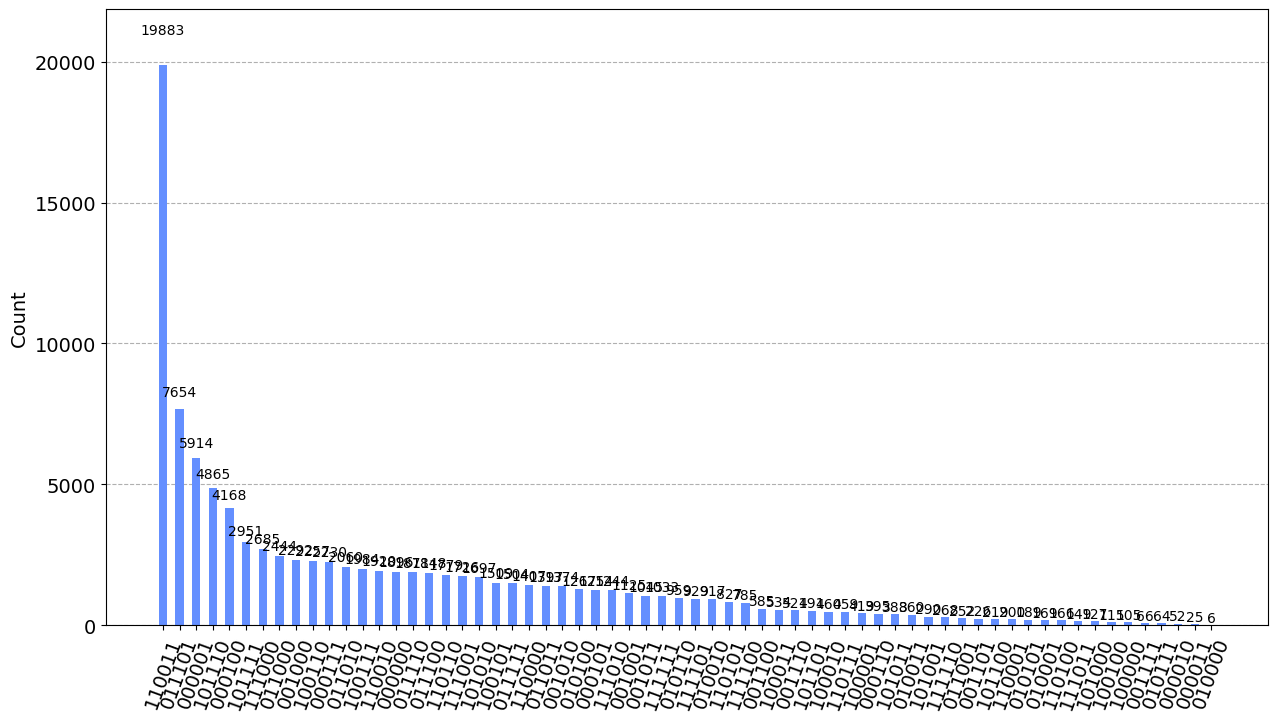

In [62]:
p = 5
obj_cost = []
obj =  get_black_box_objective(p) #cost_function_cVar(p) #
#np.random.seed(12345)
init_point = res_sv['x']
#np.random.uniform(0,np.pi, 2*p)#np.random.uniform(0,np.pi, 2*p)#np.array([2.5637967 , 3.47032884, 3.31950937, 2.83458509]) #np.array([2.5637967 , 3.47032884, 3.31950937, 2.83458509])
print(init_point)
#np.random.uniform(0,np.pi, 2*p)#np.random.randint(low = -np.pi/3, high =np.pi/4, size = 2*p)
#np.array(np.random.random_sample(size = 2*p))
#
#np.array([np.pi/8, np.pi/8 ,np.pi/8, np.pi/8,np.pi/8,
#       np.pi/4,np.pi/4 ,np.pi/4 ,np.pi/4, np.pi/4 ])
#np.array([0.81069872, 2.2067517 , 0.83830696, 2.15579759, 0.37060699,
#       2.42068091, 6.1575306 , 2.2453419 , 3.85060091, 6.137845  ])

# We are going to limit the number of iterations to 2500 
res_sample = minimize(obj, init_point, method='COBYLA', options={'maxiter':5000,'disp': True})
print(res_sample)

optimal_theta = res_sample['x']
qc = create_qaoa_circuit(prob_stat, optimal_theta[:p], optimal_theta[p:])
counts = invert_counts(backend.run(qc, shots = 100000).result().get_counts())
print(counts["110011"])
plot_histogram(counts,figsize=(15,8),sort='value_desc')

## For generating Max-3-XORSAT problem 

In [2]:
import random

In [3]:
from math import comb 
comb(6,3)

20

In [33]:
def generate_random_3_xorsat(r=3 ,n = int, num_clauses=int):
    # find the nCr to determine the number of possible contraints that can be prepared
    max_clauses = comb(n,r)
    if num_clauses>max_clauses:
        num_clauses = max_clauses
        print(f"No. of asked clauses is larger than maximum possible clauses, therfore, only {max_clauses} will be generated")
    var = range(0,n)

    cl = []
    while len(cl)<num_clauses:

        for i in range(num_clauses):
            
            # randomly sample 3 vars from 'n' and sort them 
            cl.append(tuple(np.sort(random.sample(var,k=r))))
            # redundant tuples are removed easily if sorted
            # tuples are chosen because set doesn't work on lists
            cl = list(set(cl))
            # Break if the cl has num_clauses in it 
            if len(cl) == num_clauses:
                break
            #print(cl, len(cl))
    # randomly chosen b from a range(2) to build a array of size num_clauses
    b = np.random.choice(2, num_clauses)

    return np.array([list(row) for row in cl ]), b

generate_random_3_xorsat(r=3,n=6,num_clauses=8)


(array([[2, 4, 5],
        [1, 3, 5],
        [0, 2, 3],
        [3, 4, 5],
        [0, 1, 5],
        [0, 2, 5],
        [0, 3, 5],
        [1, 2, 4]]),
 array([1, 1, 1, 1, 0, 0, 0, 1]))

In [ ]:

# Taken from github
def find_num_solutions(A_pass, b_pass):
    """
        Using row reduction, determines the number of solutions that satisfy 
        the linear system of equations given by A_pass.X = b_pass mod 2.
        Returns zero if no solutions exist.
 
    """
    A = np.copy(A_pass)
    b = np.copy(b_pass)

    M, N = A.shape

    h = 0
    k = 0

    while h < M and k < N:

        max_i = h

        for i in range(h, M):
            if A[i, k] == 1:
                max_i = i
                break

        if A[max_i, k] == 0:
            k += 1
        else:
            if h != max_i:
                A[[h, max_i]] = A[[max_i, h]]
                b[[h, max_i]] = b[[max_i, h]]

            for u in range((h + 1), M):
                flip_val = A[u, k]
                A[u] = (A[u] + flip_val * A[h]) % 2
                b[u] = (b[u] + flip_val * b[h]) % 2

            h += 1
            k += 1

    # Find rows with all zeros
    num_all_zeros_rows = 0

    solutions_exist = True

    for i in range(M):
        if not np.any(A[i]):  # All-zero row encountered

            if b[i] != 0:
                solutions_exist = False
                break

            num_all_zeros_rows += 1

    if solutions_exist:
        rank = M - num_all_zeros_rows
        num_solutions = np.power(2, N - rank)
    else:
        num_solutions = 0

    return num_solutions

In [ ]:
def plant_regular_xorsat(k, n):
    """
    Repetitively generates k-regular k-XORSAT problems until an instance
    with non-zero solutions is obtained.
    Returns the resultant XORSAT instance formulated as an
    Ising minimization problem.
    Also returns the ground state energy and ground state degenaracy.

    """

    while True:
        indices, b = regular_xorsat(k, n)

        A = np.zeros((n, n), dtype=int)

        for i, row in enumerate(indices):
            A[i, row] = 1

        num_solutions = find_num_solutions(A, b)

        if num_solutions != 0:
            break

    gs_energy = -n

    bonds = []

    for i in range(n):
        bonds.append(tuple(indices[i]) + (-np.power(-1, b[i]),))

    return bonds, gs_energy, num_solutions

plant_regular_xorsat(3,10)

([(5, 4, 3, -1),
  (8, 9, 2, -1),
  (4, 5, 1, 1),
  (3, 7, 4, 1),
  (0, 1, 8, -1),
  (9, 2, 6, -1),
  (1, 0, 7, -1),
  (7, 6, 5, -1),
  (2, 8, 0, -1),
  (6, 3, 9, 1)],
 -10,
 2)

In [ ]:
import numpy as np 

def regular_xorsat(k, n):
    """
    Generates a k-regurlar k-XORSAT instance with n variables.

    """

    indices = np.zeros((n, k), dtype=int)
    #print(indices)
    count = 0
    while True:

        for i in range(k):
            #print(indices[:, i])
            x = np.random.permutation(n)
            #print("x=",x)
            indices[:, i] = x
            #print(indices)

        if all(np.unique(row).size == k for row in indices):
            break
        

    b = np.random.choice(2, n)

    return indices, b

regular_xorsat(k=3,n=4)

(array([[0, 1, 2],
        [3, 0, 1],
        [2, 3, 0],
        [1, 2, 3]]),
 array([0, 1, 0, 1]))

## Building an planted partial solution problem  

In [36]:
xor_prob = generate_random_3_xorsat(r=3,n=6,num_clauses=8)
xor_prob


(array([[2, 4, 5],
        [0, 1, 4],
        [0, 3, 4],
        [0, 1, 3],
        [1, 2, 3],
        [0, 1, 5],
        [0, 2, 5],
        [0, 1, 2]]),
 array([1, 1, 0, 0, 1, 1, 1, 1]))

In [37]:
xor_prob[0].shape

(8, 3)

In [85]:
import numpy as np

# Define the xor_prob tuple
A_mat, b_mat = xor_prob
# Get the number of clauses and number of variables
num_clauses, _ = xor_prob[0].shape
num_vars = 6

# Initialize the matrix with zeros
mat_PPSP = np.zeros((num_clauses, num_vars))

# Fill the matrix
for idx, row in enumerate(A_mat):
    mat_PPSP[idx, row] = 1  # Direct assignment without slicing

print(mat_PPSP)


[[0. 0. 1. 0. 1. 1.]
 [1. 1. 0. 0. 1. 0.]
 [1. 0. 0. 1. 1. 0.]
 [1. 1. 0. 1. 0. 0.]
 [0. 1. 1. 1. 0. 0.]
 [1. 1. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0. 1.]
 [1. 1. 1. 0. 0. 0.]]


In [115]:
X_mat = np.zeros((num_vars,1))
np.random.seed(1)
X_mat = np.random.choice(2, num_vars)
print("X_col",X_mat.reshape((num_vars,1)))


(mat_PPSP@X_mat.reshape((num_vars,1)))%2
#b_plant = (mat_PPSP@X_mat.reshape((num_vars,1)))%2
b_plant = (mat_PPSP@X_mat)%2
print("b_plant",b_plant)
print((mat_PPSP@X_mat.reshape((num_vars,1)))%2)

X_col [[1]
 [1]
 [0]
 [0]
 [1]
 [1]]
b_plant [0. 1. 0. 0. 1. 1. 0. 0.]
[[0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]]


In [120]:
b_copy = b_mat.copy()#.reshape((num_clauses,1)).copy()
b_copy, b_plant

(array([1, 1, 0, 0, 1, 1, 1, 1]), array([0., 1., 0., 0., 1., 1., 0., 0.]))

true


In [123]:
#b_copy, b_plant = (array([1, 1, 0, 0, 1, 1, 1, 1]), array([0., 1., 0., 0., 1., 1., 0., 0.]))

# Use np.where to replace elements in b_copy where b_plant is different
b_copy = np.where(b_plant != b_copy, b_plant, b_copy)
b_copy,b_plant
    
if b_plant.all() == b_copy.all():
    print("true")

true


In [144]:
int(np.ceil(6.2))
print(mat_PPSP)
random_partial_constraint = np.random.choice(mat_PPSP.shape[0], size = 7, replace = False)
print(sorted(random_partial_constraint))
mat_PPSP[sorted(random_partial_constraint)]
print(b_mat)
btry = b_mat[sorted(random_partial_constraint)]

[[0. 0. 1. 0. 1. 1.]
 [1. 1. 0. 0. 1. 0.]
 [1. 0. 0. 1. 1. 0.]
 [1. 1. 0. 1. 0. 0.]
 [0. 1. 1. 1. 0. 0.]
 [1. 1. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0. 1.]
 [1. 1. 1. 0. 0. 0.]]
[0, 2, 3, 4, 5, 6, 7]
[1 1 0 0 1 1 1 1]


array([1, 0, 0, 1, 1, 1, 1])

In [152]:
print(b_mat)
bcpy = b_mat.copy()
print(sorted(random_partial_constraint))
btry = b_mat[sorted(random_partial_constraint)]
print(btry)
btry = [-1 for i in btry]
print(btry)
bcpy[sorted(random_partial_constraint)] = btry
print(bcpy)


[1 1 0 0 1 1 1 1]
[0, 2, 3, 4, 5, 6, 7]
[1 0 0 1 1 1 1]
[-1, -1, -1, -1, -1, -1, -1]
[-1  1 -1 -1 -1 -1 -1 -1]


In [153]:
xor_prob

(array([[2, 4, 5],
        [0, 1, 4],
        [0, 3, 4],
        [0, 1, 3],
        [1, 2, 3],
        [0, 1, 5],
        [0, 2, 5],
        [0, 1, 2]]),
 array([1, 1, 0, 0, 1, 1, 1, 1]))

In [165]:
def planted_partial_solution_xorsat(xor_prob, num_vars = 6, epsilon = 0.2):
     
    A_mat, b_mat = xor_prob # we  could in principle build a b_mat here as well 
    num_clauses = A_mat.shape[0]
    print(A_mat.shape)
    # calculate the partial num of clauses to be satisfied in the solution
    partial_num_clauses = int(np.ceil((1-epsilon)*num_clauses))
    print(partial_num_clauses)
    
    # Initialize the matrix with zeros
    mat_PPSP = np.zeros((num_clauses, num_vars))

    # make assignment matrix for the clauses
    for idx, row in enumerate(A_mat):
        mat_PPSP[idx, row] = 1  
        
    # randomly selcting some contraints included, given by partial_num_clauses
    # sorted so that it is trackable 
    random_partial_constraint = sorted(np.random.choice(mat_PPSP.shape[0], size = partial_num_clauses, replace = False))
    print(random_partial_constraint)
    
    # make the new matrix with randomly selected clauses
    A_partial = mat_PPSP[random_partial_constraint]
    b_partial = b_mat[random_partial_constraint]
    
    # seed can be removed later 
    np.random.seed(1)
    # randomly select a solution bitstring X
    X_mat = np.random.choice(2, num_vars)
    
    b_plant = (A_partial@X_mat)%2
    
    # b_copy = b_partial.copy()
    # b_copy = np.where(b_plant != b_copy, b_plant, b_copy)
    # flip the value of b (Vijk) to fulfill all randomly selected prrtial constraints and rest stays unsatisfied/or satisfied
    b_partial = np.where(b_plant != b_partial, b_plant, b_partial) 

    assert(np.array_equal(b_plant, b_partial))
    # put the planted b values back in the original b matrix
    b_mat_PPSP = b_mat.copy()
    b_mat_PPSP[random_partial_constraint] = b_partial
    return A_partial,A_partial.shape,X_mat,b_partial,b_mat_PPSP 
    
    
planted_partial_solution_xorsat(xor_prob,6,0.2)
    
    
    

(8, 3)
7
[0, 1, 2, 4, 5, 6, 7]


(array([[0., 0., 1., 0., 1., 1.],
        [1., 1., 0., 0., 1., 0.],
        [1., 0., 0., 1., 1., 0.],
        [0., 1., 1., 1., 0., 0.],
        [1., 1., 0., 0., 0., 1.],
        [1., 0., 1., 0., 0., 1.],
        [1., 1., 1., 0., 0., 0.]]),
 (7, 6),
 array([1, 1, 0, 0, 1, 1]),
 array([0., 1., 0., 1., 1., 0., 0.]),
 array([0, 1, 0, 0, 1, 1, 0, 0]))